# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives

E-news Express (an online news company) wants to expand its business by acquiring new subscribers. The company wants to analyze every user's interest and determine if a new feature will be effective or not. The design team has the currently live page (which we will refer to as the old landing page) and also set up another page with the new feature (which we will refer to as the new landing page).
I will conduct a test, with a couple users on the old landing page and a couple users on the new landing page. I will collect this data and perform statistical analysis below to determine if the new feature effectively acquires new subscribers.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
data = pd.read_csv("abtest.csv")


### Data Overview

In [3]:
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
data.shape

(100, 6)

In [5]:
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


I will ignore the user_id analysis above because the numerical value of the user_id is irrelevant to the data analysis.

In [6]:
data.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

I observe that the data basically has one row per user, with the following information:
- Is the user in the control group or the treatment group?
- Did the user see the old landing page or the new landing page?
- How long did the user spend on the page?
- Did the user convert? (a.k.a. did the user make an account?)
- What is the user's preferred language?

In addition, I observe that most variables are categorical, with only one variable that is numerical. This means that my exploratory data analysis will not involve numerical vs. numerical methods like covariance and correlation calculations.

In [7]:
# remove NA values
data.dropna(subset=["converted"],axis=0,inplace=True)
data.reset_index(drop=True)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [8]:
data.shape

(100, 6)

It looks like there are no NaNs in the converted column. In the grand scheme of things this should be all that matters because this is the ultimate outcome of the user that we care about.

But for giggles, let's see if there are any NaN values anywhere

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.5+ KB


The above proved that we have a clean data set, with all the fields populated with a value.

### Univariate Analysis

The below functions will be used to aid with visualizations for the Univariate Analysis and Bivariate Analysis.

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

Let's see what conclusions we can make by one variable.

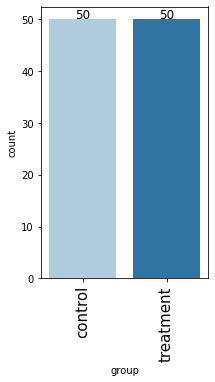

In [12]:
labeled_barplot(data,"group")

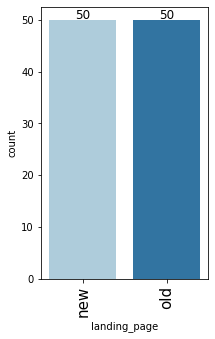

In [13]:
labeled_barplot(data,"landing_page")

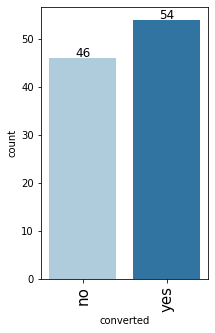

In [14]:
labeled_barplot(data,"converted")

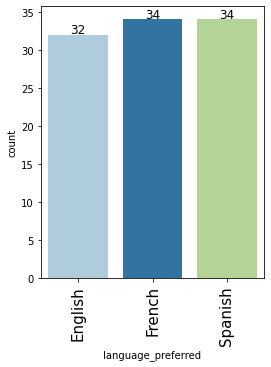

In [15]:
labeled_barplot(data,"language_preferred")

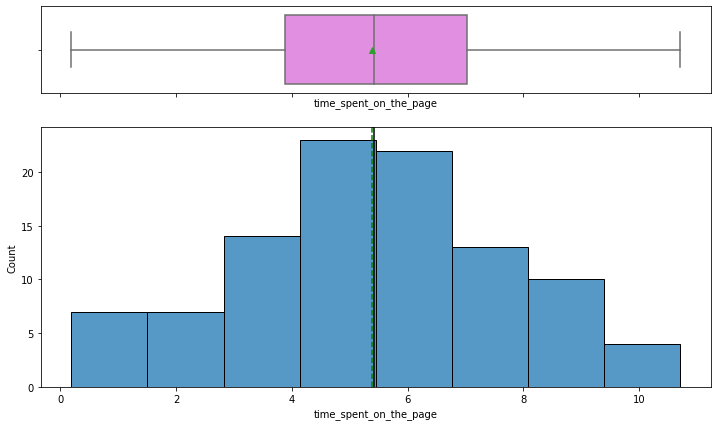

In [16]:
histogram_boxplot(data,"time_spent_on_the_page")

#### Univariate Analysis observations:
- We had a good testing population. Confirmed that we have half the population in the control group and the other half in the treatment group. Also, confirmed that we have half the population in the old landing page and the other half in the new landing page.
- We had 54% of the population that converted, and 46% did not convert. In other words, 8% more of the population converted.
- The chosen language for the landing page by users is about evenly split amongst English, French, and Spanish.
- The time spent on the page generally follows a normal distribution. The mean time spent is about 5.3 minutes. The interquartile range is about 3.9 to 7.0 minutes. The minimum time spent is 0.2 minutes, and the maximum time spent is 10.7 minutes.

### Bivariate Analysis

The "time_spent_on_the_page" variable is the only numerical variable, so I will do numerical vs. categorial analysis with this variable vs. all the other ones.

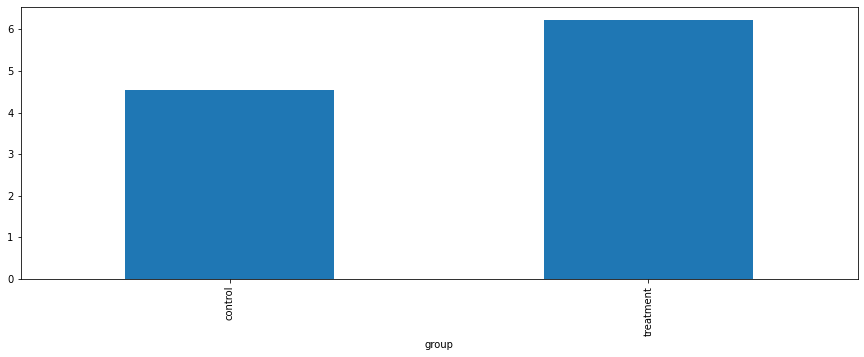

In [17]:
data.groupby(by=['group'])['time_spent_on_the_page'].mean().plot(x='group',y='time_spent_on_the_page', kind='bar',figsize=(15,5))
plt.show()

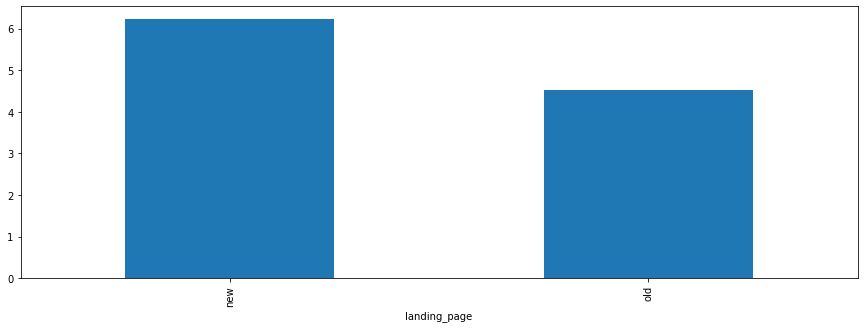

In [18]:
data.groupby(by=['landing_page'])['time_spent_on_the_page'].mean().plot(x='landing_page',y='time_spent_on_the_page', kind='bar',figsize=(15,5))
plt.show()

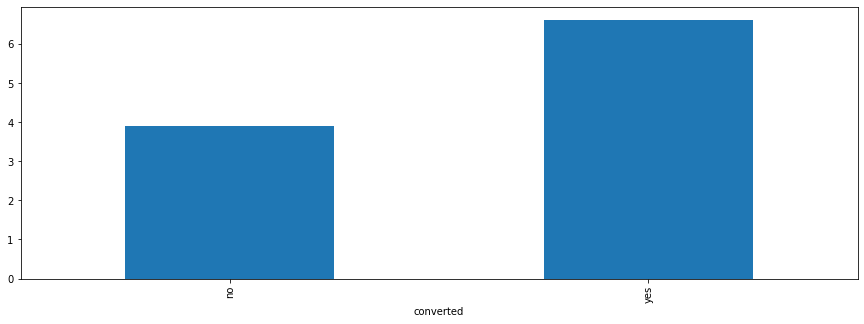

In [19]:
data.groupby(by=['converted'])['time_spent_on_the_page'].mean().plot(x='converted',y='time_spent_on_the_page', kind='bar',figsize=(15,5))
plt.show()

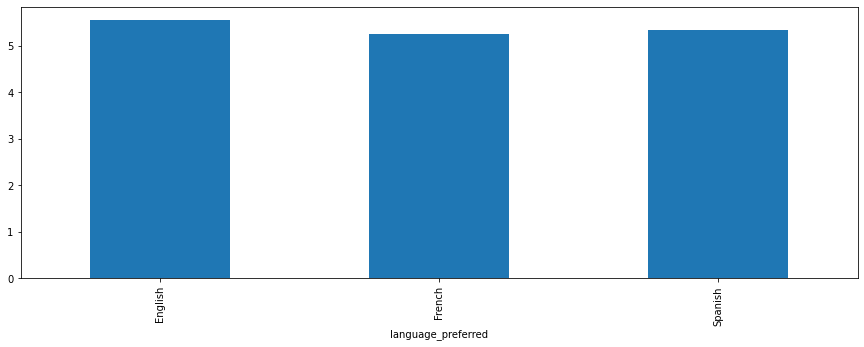

In [20]:
data.groupby(by=['language_preferred'])['time_spent_on_the_page'].mean().plot(x='language_preferred',y='time_spent_on_the_page', kind='bar',figsize=(15,5))
plt.show()

#### Observations from the numerical vs. categorical analysis:
- On average, the control group spent less time than the treatment group.
- On average, users spent more time on the new landing page than the old landing page.
- On average, users that converted spent more time on the landing page than users that did not convert.
- On average, users spent about the same time on the landing page regardless of language preference.

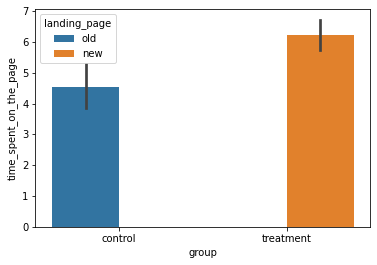

In [21]:
sns.barplot(data=data,x="group",y="time_spent_on_the_page",hue="landing_page")
plt.show()

This shows that the group and landing_page columns are effectively conveying the same information. Those in the control group are only viewing the old landing page, while those in the treatment group are only viewing the new landing page. This is good reassurance that we did not do incorrect testing. I will generally treat these as the same column going forward.

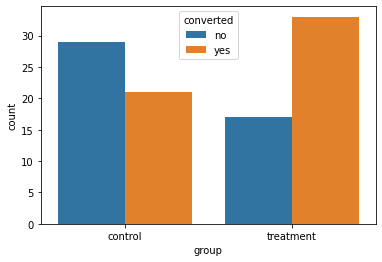

In [22]:
sns.countplot(data=data,x="group",order=data.group.value_counts().index,hue="converted")
plt.show()

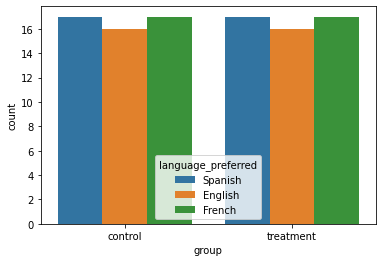

In [23]:
sns.countplot(data=data,x="group",order=data.group.value_counts().index,hue="language_preferred")
plt.show()

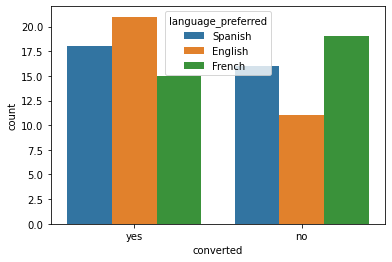

In [24]:
sns.countplot(data=data,x="converted",order=data.converted.value_counts().index,hue="language_preferred")
plt.show()

#### Observations from the categorical vs. categorial analysis:
- There appears to be more users converted from the treatment group compared to the control group.
- There appears to be no relationship between which group a user is in and what the user's preferred language was.
- Users with a preferred language of English were more likely to convert.
- Users with a preferred language of French were less likely to convert.
- Users with a preferred language of Spanish were slightly more likely to convert.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

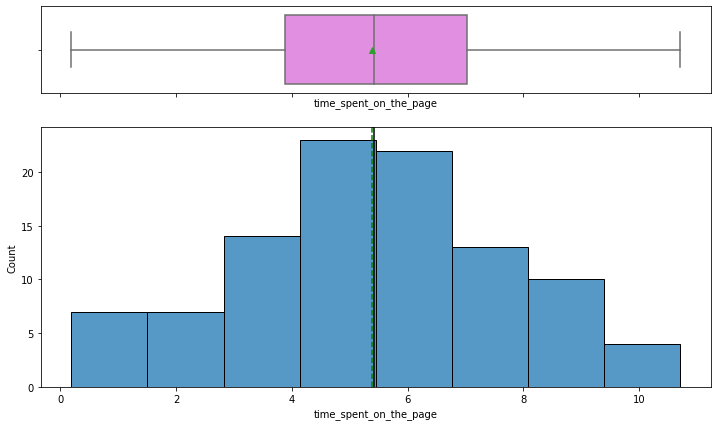

In [25]:
histogram_boxplot(data,"time_spent_on_the_page")

The full data set follows about a normal distribution.

Let's see if the data sets for just the old landing page and just the new landing page follow the same behavior.

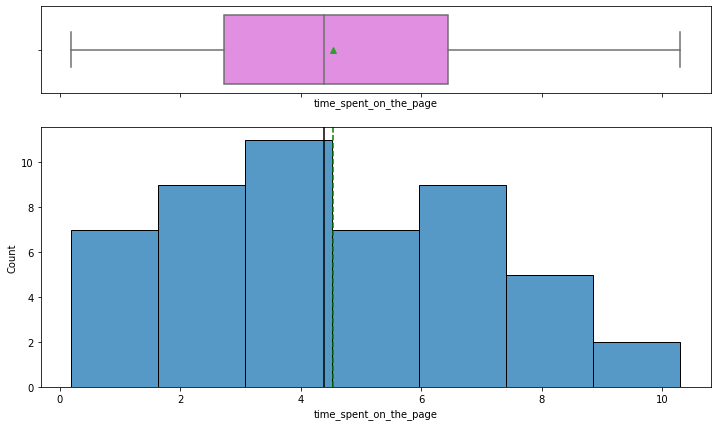

In [26]:
histogram_boxplot(data[data["landing_page"]=="old"],"time_spent_on_the_page")

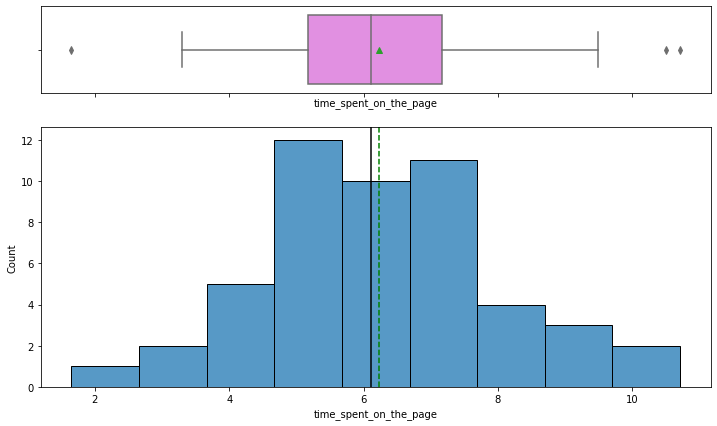

In [27]:
histogram_boxplot(data[data["landing_page"]=="new"],"time_spent_on_the_page")

Confirmed that both generally follow a normal distribution!

Let $\mu_N$ be the mean time spent on the new landing page.
Let $\mu_O$ be the mean time spent on the old landing page.

The null hypothesis is that the mean time spent on the new landing page is equal to the time spent on the old landing page. This is stated as 

>$H_0$: $\mu_N$ = $\mu_O$

The alternative hypothesis is that the mean time spent on the new landing page is longer than the time spent on the old landing page. This is stated as

>$H_a$: $\mu_N$ > $\mu_O$

We have 2 sample means that we want to compare, and the standard deviations are unknown. We will also assume that the samples are continuous and from normally distributed and independent populations. The standard deviation is unknown.

So, a 2-sample ind. t-test is appropriate.

We will assume a significance level of 0.05.

In [28]:
# pull the time data from new landing page and old landing page into variables
new_time=data[data["landing_page"]=="new"]["time_spent_on_the_page"]
old_time=data[data["landing_page"]=="old"]["time_spent_on_the_page"]

In [29]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_time,old_time,equal_var = True, alternative = "greater")
print('The p-value is ' + str(p_value))

The p-value is 0.0001316123528095005


The p-value of 0.00013 is much less than the level of significance value of 0.05.

The p-value is much less than the level of signifance value, so we reject the null hypothesis. This means that the mean time spent on the new landing page is longer than the time spent on the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? 

Repasting a visual from an above section (but using the landing_page variable instead of the group variable) that showed at a glance that more users converted from the new landing page compared to the old landing page.

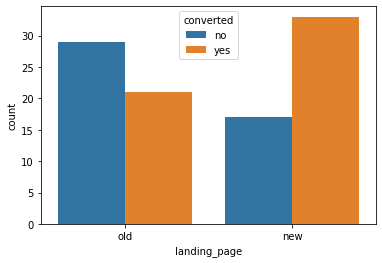

In [30]:
sns.countplot(data=data,x="landing_page",order=data.landing_page.value_counts().index,hue="converted")
plt.show()

Let $p_N$ be the proportion of users converted from the new landing page.
Let $p_O$ be the proportion of users converted from the old landing page.

The null hypothesis is that the proportion of users converted from new landing page is equal to the proportion of users converted from the old landing page. This is stated as 

>$H_0$: $p_N$ = $p_O$

The alternative hypothesis is that the proportion of users converted from the new landing page is greater than proportion of users converted from the old landing page. This is stated as

>$H_a$: $p_N$ > $p_O$

We are testing for equality of two population proportions. Also, we can assume that the the populations are independent and binomially distributed based on the visual analysis from Question#2. Also, np and n(1-p) are greater than or equal to 10 (see below). So, we will use a two proportions z-test.



In [31]:
n_n = data[data["landing_page"]=="new"].shape[0]
print("The n value for the new landing page is " + str(n_n))
n_o = data[data["landing_page"]=="old"].shape[0]
print("The n value for the old landing page is " + str(n_o))
numer_n = data[(data["landing_page"]=="new") & (data["converted"]=="yes")].shape[0]
print("The numerator proportion value for the new landing page is " + str(numer_n))
numer_o = data[(data["landing_page"]=="old") & (data["converted"]=="yes")].shape[0]
print("The numerator proportion value for the old landing page is " + str(numer_o))
print("The np value for the new landing page is " + str(n_n*numer_n/n_n))
print("The n(1-p) value for the new landing page is " + str(n_n*(n_n-numer_n)/n_n))
print("The np value for the old landing page is " + str(n_o*numer_o/n_o))
print("The n(1-p) value for the old landing page is " + str(n_o*(n_o-numer_o)/n_o))

The n value for the new landing page is 50
The n value for the old landing page is 50
The numerator proportion value for the new landing page is 33
The numerator proportion value for the old landing page is 21
The np value for the new landing page is 33.0
The n(1-p) value for the new landing page is 17.0
The np value for the old landing page is 21.0
The n(1-p) value for the old landing page is 29.0


>$np_n = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_n) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_o = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_o) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

We will assume a level of significance value of 0.05.

In [32]:
from statsmodels.stats.proportion import proportions_ztest
proportion_sizes = np.array([33,21])
sample_sizes = np.array([50,50])
test_stat, p_value = proportions_ztest(proportion_sizes,sample_sizes)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


The p-value is 0.016, which is lower than the level of significance value of 0.05, so we reject the null hypothesis. This means that the proportion of users converted from the new landing page is greater than proportion of users converted from the old landing page. 

## 3. Is the conversion and preferred language are independent or related?

Repasting a visual from an above section that showed at a glance that preferred language has an effect on conversion.

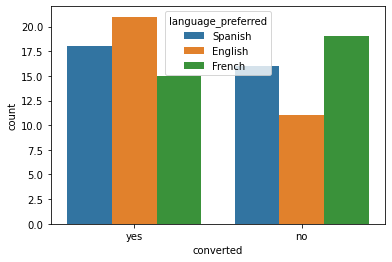

In [33]:
sns.countplot(data=data,x="converted",order=data.converted.value_counts().index,hue="language_preferred")
plt.show()

We will test the null hypothesis

>$H_0$: Conversion is independent of preferred language

against the alternative hypothesis

>$H_a$: Conversion depends on preferred language




The sample has categorical values, the expected value of the number of sample observations in each level of the variable is at least 5, and there was random sampling from the population. Therefore, the Chi-Square Test for Independence is the appropriate test to use.

We will assume a level of significance value of 0.05.

In order to run against this test, we have to restructure the dataframe such that we have "Preferred Language" in one column and "Converted - Yes" and "Converted - No" in subsequent columns.

In [34]:
# only pull the language_preferred and converted columns
lang_conv = data[["language_preferred","converted"]]

# create new columns for Converted - Yes and Converted - No
lang_conv["Converted - Yes"] = np.where(lang_conv["converted"]=="yes",1,0)
lang_conv["Converted - No"] = np.where(lang_conv["converted"]=="no",1,0)

# drop the original converted column
lang_conv.drop("converted",axis=1,inplace=True)

C:\Users\prani\AppData\Local\Temp/ipykernel_29204/3407250965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_conv["Converted - Yes"] = np.where(lang_conv["converted"]=="yes",1,0)
C:\Users\prani\AppData\Local\Temp/ipykernel_29204/3407250965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_conv["Converted - No"] = np.where(lang_conv["converted"]=="no",1,0)
C:\Users\prani\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [35]:
# update dataframe format to group by preferred language
pref_lang_conv = lang_conv.groupby(["language_preferred"])["language_preferred","Converted - Yes","Converted - No"].sum()
pref_lang_conv.reset_index(inplace=True)

C:\Users\prani\AppData\Local\Temp/ipykernel_29204/2271616598.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pref_lang_conv = lang_conv.groupby(["language_preferred"])["language_preferred","Converted - Yes","Converted - No"].sum()


In [36]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(pref_lang_conv.drop("language_preferred",axis=1))
print('The p-value is', p_value)

The p-value is 0.2129888748754345


The p-value of 0.21 is higher than the level of significance value of 0.05. Therefore, we fail to reject the null hypothesis. This means that the conversion is independent of preferred language.

## 4. Is the time spent on the new page same for the different language users?

We will make a new box plot that compares preferred language to time spent on the page.

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

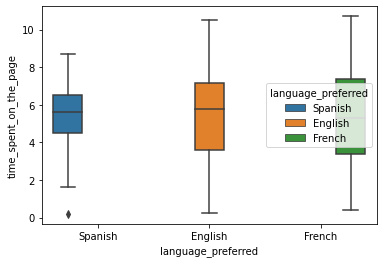

In [37]:
sns.boxplot(x="language_preferred",y="time_spent_on_the_page",data=data,hue="language_preferred")

At a glance, the time spent on the page appears to be around the same across all preferred languages.

The samples are independent simple random samples. However, if we want to use the one-way ANOVA test, we must confirm if the populations are normally distributed (Shapiro-Wilk's test) and if it has equality of variance (Levene's test).

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [38]:
from scipy import stats
w, p_value = stats.shapiro(data["time_spent_on_the_page"])
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Because the p-value is large, we fail to reject the null hypothesis. This proves that the populations are normally distributed.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [39]:
from scipy.stats import levene
statistic, p_value = levene(data["time_spent_on_the_page"][data["language_preferred"]=="English"],
                           data["time_spent_on_the_page"][data["language_preferred"]=="Spanish"],
                           data["time_spent_on_the_page"][data["language_preferred"]=="French"])
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Because the p-value is larger than a level of signifance value of 0.05, we fail to reject the null hypothesis. This proves that all the population variances are equal.

Now that we proved that the populations are normally distributed and the variances are equal, we can do the one-way ANOVA test - specifically the Tukey HSD test.

### Multiple Comparison Test (Tukey HSD)

Let $\mu_S$ be the mean of time spent on the page by users whose preferred language is Spanish.
Let $\mu_E$ be the mean of time spent on the page by users whose preferred language is English.
Let $\mu_F$ be the mean of time spent on the page by users whose preferred language is French.

We will test the null hypothesis

>$H_0: \mu_S = \mu_E = \mu_F$

against the alternative hypothesis

>$H_a:$ At least one time spent on the page is different from the rest.

We will assume a level of significance value of 0.05.

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog = data['time_spent_on_the_page'], groups = data['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


As the p-values (from the p-adj column) are all above the level of significance value of 0.05, we fail to reject the null hypothesis. Thus, we can say that the mean time spent on the page is similar through users of all preferred languages.

## Conclusion and Business Recommendations

Overall, the new feature is definitely successful. 
- The new feature must be selling the business well because the proportion of users converted from the new landing page is greater than proportion of users converted from the old landing page. 
- In addition, users must be enjoying their experience on the new landing page because on average, users spend more time on the new landing pager compared to the old landing page.
- The new feature is accessible to users of all backgrounds because the conversion percentage and mean time spent on the page is independent of the users' preferred language.